<a href="https://colab.research.google.com/github/khaledBakry99/Film-management-website/blob/main/ITE_SAD601_C1_F23_HW_Khaled_135930_Raghad_112359_leen_108102_Esraa_139717.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1- Define the flow graph:

Enter the number of nodes in the graph: 5
Enter the name of node 1: A
Enter the name of node 2: B
Enter the name of node 3: C
Enter the name of node 4: D
Enter the name of node 5: E
Enter the number of edges in the graph (0 to 20): 7
Enter edge 1 in the format 'source target capacity': A B 10
Enter edge 2 in the format 'source target capacity': A C 15
Enter edge 3 in the format 'source target capacity': B D 10
Enter edge 4 in the format 'source target capacity': C E 10
Enter edge 5 in the format 'source target capacity': D E 10
Enter edge 6 in the format 'source target capacity': B C 5
Enter edge 7 in the format 'source target capacity': C D 10
Enter the name of the source node: A
Enter the name of the sink node: E

2- Implement the Ford-Fulkerson Algorithm:

Maximum Flow: 20.0

3- Analyze the network:

Capacities: {('A', 'B'): 10.0, ('A', 'C'): 15.0, ('B', 'D'): 10.0, ('B', 'C'): 5.0, ('C', 'E'): 10.0, ('C', 'D'): 10.0, ('D', 'E'): 10.0}
Flow Rates: {('A', 

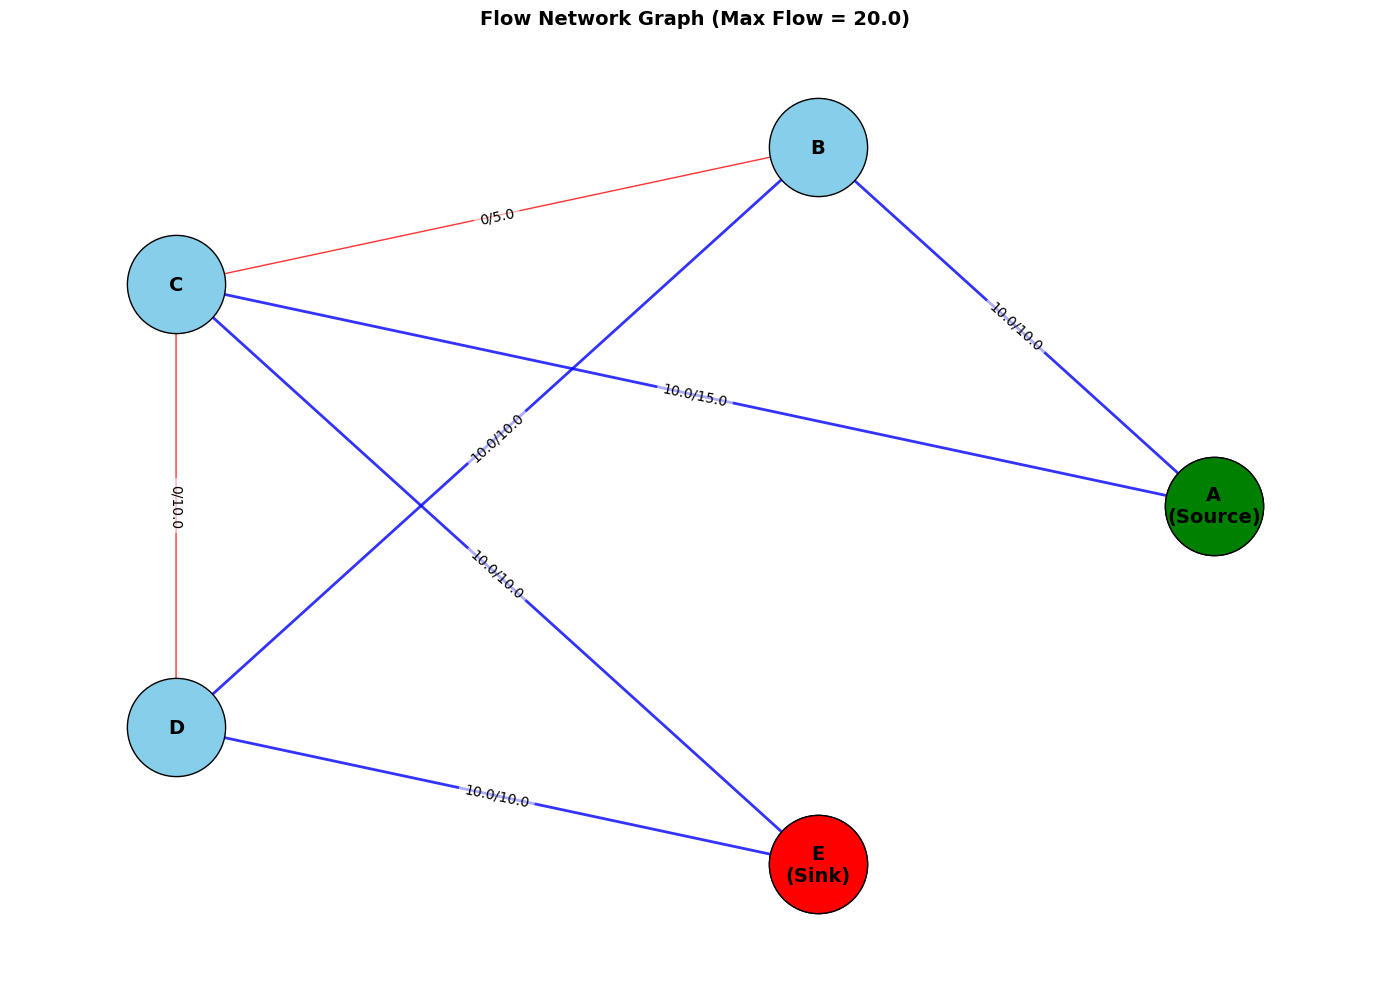


5- Compare the results: (100 node network)


Ford-Fulkerson Algorithm:

Maximum Flow: 4909
Elapsed Time: 0.14929
Time Complexity: O(E * |f*| * C) = 1234035000
Scalability: 50.987224  Execution Times: [50 node: 0.019335  , 100 node: 0.134631 , 150 node: 0.391854 , 200 node: 0.985843


Edmonds-Karp Algorithm:

Maximum Flow: 4869
Elapsed Time: 0.15078
Time Complexity: O(V * E^2) = 9801000000
Accuracy: 1.0  (same Maximum Flow as Ford-Fulkerson Algorithm)
Scalability: 78.089301  Execution Times: [50 node: 0.02209  , 100 node: 0.127917 , 150 node: 0.41852 , 200 node: 1.725026


Dinic Algorithm:

Maximum Flow: 4949
Elapsed Time: 0.22376
Time Complexity: O(V^2 * E) = 99000000
Accuracy: 1.0  (same Maximum Flow as Ford-Fulkerson Algorithm)
Scalability: 10.92349  Execution Times: [50 node: 0.050147  , 100 node: 0.225921 , 150 node: 0.284376 , 200 node: 0.547779

The Fastest Algorithm is: Ford-Fulkerson 


6- Applications:
Water distributing network from 'Ein Al Fejeh' to Damascus city areas

Net

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import timeit
import random

# Breadth First Search Algorithm
def breadth_first_search(flow_network, start_node, end_node):
    visited = set()
    queue = [(start_node, ())]
    visited.add(start_node)

    while queue:
        node, path = queue.pop(0)

        if node == end_node:
            # Found a path to the target
            return path + (node,)

        for neighbor in flow_network.neighbors(node):
            if neighbor not in visited and flow_network.edges[node, neighbor]['capacity'] > 0:
                visited.add(neighbor)
                queue.append((neighbor, path + (node,)))

    # No path to the target
    return None


# Edmonds Karp Algorithm
from collections import deque

def edmonds_karp_algorithm(flow_network, source_node, sink_node):
    residual_graph = flow_network.copy()
    max_flow = 0
    flow_rates = {(u, v): 0 for u, v in residual_graph.edges()}

    while True:
        # Find the shortest path in terms of number of edges using BFS
        path = breadth_first_search(residual_graph, source_node, sink_node)
        if not path:
            break

        # Determine the bottleneck capacity in the found path
        bottleneck_capacity = float('Inf')
        for u, v in zip(path, path[1:]):
            capacity = residual_graph.edges[u, v]['capacity']
            bottleneck_capacity = min(bottleneck_capacity, capacity)

        # Update flow along the path and adjust residual capacities
        for u, v in zip(path, path[1:]):
            if (u, v) in residual_graph.edges():
                flow_rates[u, v] += bottleneck_capacity
                residual_graph.edges[u, v]['capacity'] -= bottleneck_capacity
            else:
                flow_rates[v, u] -= bottleneck_capacity
                residual_graph.edges[v, u]['capacity'] += bottleneck_capacity

    # Calculate the maximum flow leaving the source node
    max_flow = sum(flow_rates[source_node, v] for v in residual_graph.successors(source_node))

    return max_flow, flow_rates


# Dinic Algorithm
def dinic_algorithm(flow_network, source_node, sink_node):
    def bfs(residual_graph, start, end):
        level = {node: -1 for node in residual_graph.nodes()}
        level[start] = 0
        queue = [start]
        while queue:
            node = queue.pop(0)
            for neighbor, attr in residual_graph[node].items():
                if level[neighbor] < 0 and attr['capacity'] > 0:
                    level[neighbor] = level[node] + 1
                    queue.append(neighbor)
        return level

    def send_flow(residual_graph, u, sink, flow, level, ptr, flow_rates):
        if u == sink:
            return flow
        while ptr[u] < len(residual_graph[u]):
            v = list(residual_graph[u])[ptr[u]]
            attr = residual_graph[u][v]
            if level[v] == level[u] + 1 and attr['capacity'] > 0:
                min_flow = min(flow, attr['capacity'])
                actual_flow = send_flow(residual_graph, v, sink, min_flow, level, ptr, flow_rates)
                if actual_flow > 0:
                    attr['capacity'] -= actual_flow
                    flow_rates[(u, v)] += actual_flow
                    if residual_graph.has_edge(v, u):
                        residual_graph[v][u]['capacity'] += actual_flow
                    else:
                        residual_graph.add_edge(v, u, capacity=actual_flow)
                    return actual_flow
            ptr[u] += 1
        return 0

    residual_graph = flow_network.copy()
    flow_rates = {(u, v): 0 for u, v in residual_graph.edges()}
    max_flow = 0
    while True:
        level = bfs(residual_graph, source_node, sink_node)
        if level[sink_node] < 0:
            break
        ptr = {node: 0 for node in residual_graph.nodes()}
        while True:
            flow = send_flow(residual_graph, source_node, sink_node, float('inf'), level, ptr, flow_rates)
            if flow == 0:
                break
            max_flow += flow
    return max_flow, flow_rates

# Create the flow network
def create_flow_network():
    flow_network = nx.DiGraph()

    while True:
        try:
            num_nodes = int(input("Enter the number of nodes: "))
            if num_nodes <= 1:
                print("Number of nodes must be a positive integer and bigger than 1.")
            else:
                break
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    for i in range(num_nodes):
        node = input("Enter the name of node {}: ".format(i + 1))
        flow_network.add_node(node)

    while True:
        try:
            num_edges = int(input("Enter the number of edges: "))
            if num_edges < 0 or num_edges > num_nodes * (num_nodes - 1):
                print("Invalid number of edges.")
            else:
                break
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    for i in range(num_edges):
        while True:
            edge = input("Enter the edge in the format 'source target capacity': ")
            parts = edge.split()
            if len(parts) != 3:
                print("Invalid input. Please enter the edge in the correct format.")
                continue

            source, target, capacity = parts
            if not flow_network.has_node(source) or not flow_network.has_node(target):
                print("Invalid nodes. Please enter valid source and target nodes.")
                continue

            try:
                capacity = int(capacity)
                if capacity < 0:
                    print("Invalid capacity. Capacity must be a non-negative integer.")
                    continue

                if flow_network.has_edge(source, target):
                    print("Duplicate edge. Please enter a unique edge.")
                    continue

                flow_network.add_edge(source, target, capacity=capacity)
                break
            except ValueError:
                print("Invalid input. Please enter a valid capacity.")

    source_node = input("Enter the source node: ")
    while source_node not in flow_network.nodes():
        print("Invalid source node. Please enter a valid node.")
        source_node = input("Enter the source node: ")

    sink_node = input("Enter the sink node: ")
    while sink_node not in flow_network.nodes():
        print("Invalid sink node. Please enter a valid node.")
        sink_node = input("Enter the sink node: ")

    return flow_network, source_node, sink_node
#######################################################################

def define_graph():
    graph = nx.DiGraph()

    # Define nodes
    while True:
        try:
            num_nodes = int(input("Enter the number of nodes in the graph: "))
            if num_nodes <= 1:
                raise ValueError("The number of nodes must be a positive integer.")
            break
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

    nodes = []
    for i in range(1, num_nodes + 1):
        node_name = input(f"Enter the name of node {i}: ").strip()
        nodes.append(node_name)
        graph.add_node(node_name)

    # Define edges
    while True:
        try:
            num_edges = int(input(f"Enter the number of edges in the graph (0 to {num_nodes*(num_nodes-1)}): "))
            if not (0 <= num_edges <= num_nodes * (num_nodes - 1)):
                raise ValueError(f"The number of edges must be between 0 and {num_nodes * (num_nodes - 1)}.")
            break
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

    for i in range(1, num_edges + 1):
        while True:
            edge_input = input(f"Enter edge {i} in the format 'source target capacity': ")
            parts = edge_input.split()
            if len(parts) != 3:
                print("Invalid input: Incorrect number of values. Please enter exactly three values separated by spaces.")
                continue
            source, target, capacity = parts
            try:
                capacity = float(capacity)
                if capacity <= 0:
                    raise ValueError("Capacity must be a positive number.")
                if source not in nodes or target not in nodes:
                    raise ValueError("Source and target must be valid node names.")
                graph.add_edge(source, target, capacity=capacity)
                break
            except ValueError as e:
                print(f"Invalid input: {e}. Please try again.")

    # Define source and sink nodes
    while True:
        source = input("Enter the name of the source node: ").strip()
        if source in nodes:
            break
        else:
            print("Invalid input: Source node must be a valid node name. Please try again.")

    while True:
        sink = input("Enter the name of the sink node: ").strip()
        if sink in nodes:
            break
        else:
            print("Invalid input: Sink node must be a valid node name. Please try again.")



    return graph, source, sink

#2- Implement the Ford-Fulkerson Algorithm:
def ford_fulkerson_algorithm(graph, source_node, sink_node):

    # Create a residual graph as a copy of the original graph
    residual_graph = graph.copy()

    # Initialize the flow rates dictionary with zero flow on all edges
    flow_rates = {(u, v): 0 for u, v in residual_graph.edges()}

    max_flow = 0

    while True:
        # Find a path from source to sink in the residual graph using Breadth-First Search
        path = breadth_first_search(residual_graph, source_node, sink_node)

        if not path:
            # If No more augmenting paths, terminate the loop
            break

        # Determine the bottleneck capacity along the augmenting path
        bottleneck_capacity = min(residual_graph.edges[u, v]['capacity'] for u, v in zip(path, path[1:]))

        # Update the flow rates and residual capacities along the augmenting path
        for u, v in zip(path, path[1:]):
            if (u, v) in residual_graph.edges():
                # Forward edge: increase flow rate and decrease residual capacity
                flow_rates[u, v] += bottleneck_capacity
                residual_graph.edges[u, v]['capacity'] -= bottleneck_capacity
            else:
                # Backward edge: decrease flow rate and increase residual capacity
                flow_rates[v, u] -= bottleneck_capacity
                residual_graph.edges[v, u]['capacity'] += bottleneck_capacity

    # Calculate the maximum flow by summing the flow rates leaving the source
    max_flow = sum(flow_rates[source_node, v] for v in residual_graph.successors(source_node))

    return max_flow, flow_rates


#3- Analyze the network:
def analyze_network(graph, flow_rates):
    capacities = {}        # Dictionary to store the capacities of edges
    cut_set = []           # List to store the edges in the cut set
    critical_paths = []    # List to store the edges in the critical paths
    bottlenecks = []       # List to store the bottlenecks along edges

    for edge in graph.edges():
        source, target = edge
        capacity = graph[source][target]['capacity']
        capacities[edge] = capacity

        # Calculate the cut set
        if graph[source][target]['capacity'] > 0 and flow_rates[edge] < graph[source][target]['capacity']:
            # Add the edge to the cut set if it has capacity but the flow rate is less than the capacity
            cut_set.append(edge)

        # Calculate the critical path
        if flow_rates[edge] > 0:
            # Add the edge to the critical path if it has non-zero flow rate
            critical_paths.append(edge)

            # Calculate the bottleneck
            bottleneck_value = min(flow_rates[edge], graph[source][target]['capacity'] - flow_rates[edge])
            bottlenecks.append((edge, bottleneck_value))

    return capacities, cut_set, critical_paths, bottlenecks
##########################################################################

# Visualize the flow network graph
def visualize_flow_network(graph, flow_rates, max_flow_value, source_node, sink_node, node_color='skyblue', edge_color='black', flow_color='black'):
    plt.figure(figsize=(14, 10))

    # Create a layout for the graph (using a circular layout for better clarity)
    pos = nx.circular_layout(graph)

    # Draw the nodes with customized styling
    nx.draw_networkx_nodes(graph, pos, node_color=node_color, node_size=5000, edgecolors='black')

    # Draw the edges with customized styling based on flow rates
    edge_colors = ['blue' if flow_rates[(u, v)] > 0 else 'red' for u, v in graph.edges()]
    edge_widths = [2 if flow_rates[(u, v)] > 0 else 1 for u, v in graph.edges()]
    nx.draw_networkx_edges(graph, pos, width=edge_widths, edge_color=edge_colors, alpha=0.8, arrows=True, arrowstyle='-|>', min_source_margin=22, min_target_margin=22)

    # Draw the labels of the nodes
    node_labels = {node: node if node != source_node and node != sink_node else f"{node}\n(Source)" if node == source_node else f"{node}\n(Sink)" for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=14, font_color='black', font_weight='bold')

    # Draw the edge labels with flow rates and capacities
    capacities = nx.get_edge_attributes(graph, 'capacity')
    edge_labels = {(u, v): f"{flow_rates.get((u, v), 0)}/{capacities[(u, v)]}" for u, v in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

    # Highlight source and sink nodes
    nx.draw_networkx_nodes(graph, pos, nodelist=[source_node], node_color='green', node_size=5000, edgecolors='black')
    nx.draw_networkx_nodes(graph, pos, nodelist=[sink_node], node_color='red', node_size=5000, edgecolors='black')

    # Set the title and adjust plot margins
    plt.title(f"Flow Network Graph (Max Flow = {max_flow_value})", fontsize=14, fontweight='bold')
    plt.margins(0.1)

    # Display the plot
    plt.tight_layout()
    plt.axis('off')  # Turn off axis to prevent overlapping with node labels
    plt.show()



# Compare different maximum flow algorithms
def compare_maximum_flow_algorithms():

    # Dictionary of algorithms to compare
    algorithms = {
        'Ford-Fulkerson': ford_fulkerson_algorithm,
        'Edmonds-Karp': edmonds_karp_algorithm,
        'Dinic': dinic_algorithm
    }
    results = {}

    # Create a random graph with 100 nodes
    random_graph = nx.DiGraph()
    nodes = range(1, 100+1)
    random_graph.add_nodes_from(nodes)

    # Add edges with random capacities
    for u in nodes:
        for v in nodes:
            if u != v:
                capacity = random.randint(1, 50)  # Assign a random capacity to the edge
                random_graph.add_edge(u, v, capacity=capacity)

    source_node = 1  # Specify the source node
    sink_node = 100  # Specify the sink node

    # Calculate the maximum flow using Ford-Fulkerson algorithm
    ford_fulkerson_max_flow, _ = algorithms['Ford-Fulkerson'](random_graph, source_node, sink_node)

    for algorithm_name, algorithm_func in algorithms.items():
        # Measure the execution time of the algorithm
        start_time = timeit.default_timer()
        max_flow_value, flow_rates = algorithm_func(random_graph, source_node, sink_node)
        elapsed_time = timeit.default_timer() - start_time

        # Calculate the time complexity of the algorithm
        if algorithm_name == 'Ford-Fulkerson':
            # Time complexity of Ford-Fulkerson algorithm
            time_complexity = "O(E * |f*| * C) = " + str(len(random_graph.edges()) * max_flow_value * max(random_graph.edges[u, v]['capacity'] for u, v in random_graph.edges()))

        elif algorithm_name == 'Edmonds-Karp':
            # Time complexity of Edmonds-Karp algorithm
            time_complexity = "O(V * E^2) = " + str(len(random_graph.nodes()) * len(random_graph.edges())**2)

        elif algorithm_name == 'Dinic':
            # Time complexity of Dinic algorithm
            time_complexity = "O(V^2 * E) = " + str(len(random_graph.nodes())**2 * len(random_graph.edges()))

        # Calculate the accuracy relative to Ford-Fulkerson algorithm
        accuracy = max_flow_value / ford_fulkerson_max_flow if ford_fulkerson_max_flow > 0 else 1.0

        # Measure the execution times for different network sizes
        execution_times = []
        for network_size in [50, 100, 150, 200]:
            # Create a random graph with the specified network size
            random_graph2 = nx.DiGraph()
            nodes = range(1, network_size+1)
            for u in nodes:
                for v in nodes:
                    if u != v:
                        capacity = random.randint(1, 50)  # Assign a random capacity to the edge
                        random_graph2.add_edge(u, v, capacity=capacity)

            source_node2 = 1  # Specify the source node
            sink_node2 = network_size  # Specify the sink node

            # Measure the execution time of the algorithm
            start_time1 = timeit.default_timer()
            max_flow_value, _ = algorithm_func(random_graph2, source_node2, sink_node2)
            elapsed_time1 = timeit.default_timer() - start_time1

            # Store the execution time for the current network size
            execution_times.append(elapsed_time1)

        # Calculate the scalability by observing how execution time changes with network size
        scalability = execution_times[-1] / execution_times[0]

        # Store the results for the current algorithm
        results[algorithm_name] = {
            'Maximum Flow Value': max_flow_value,
            'Elapsed Time': elapsed_time,
            'Time Complexity': time_complexity,
            'Accuracy': accuracy,
            'Execution Times': execution_times,
            'Scalability': scalability,
        }

    return results
#####################################################################
def water_distribution_network():
    # Create a graph that represents real-world applications like water distribution networks
    # The network shows the distributing water from 'Ein Al Fejeh' to Damascus city areas
    water_network = nx.DiGraph()
    water_network.add_edges_from([('Ein Al Fejeh', 'Al Rabwah', {'capacity': 70, 'flow': 0}),
                                  ('Ein Al Fejeh', 'Al Salihiyah', {'capacity': 62, 'flow': 0}),
                                  ('Al Rabwah', 'Al Salihiyah', {'capacity': 8, 'flow': 0}),
                                  ('Al Rabwah', 'Barzeh', {'capacity': 40, 'flow': 0}),
                                  ('Al Salihiyah', 'Abu Rummaneh', {'capacity': 35, 'flow': 0}),
                                  ('Barzeh', 'Abu Rummaneh', {'capacity': 6, 'flow': 0}),
                                  ('Abu Rummaneh', 'Shaalan', {'capacity': 44, 'flow': 0}),
                                  ('Barzeh', 'Ruken Al Deen', {'capacity': 51, 'flow': 0}),
                                  ('Shaalan', 'Mezzeh 86', {'capacity': 41, 'flow': 0}),
                                  ('Ruken Al Deen', 'Al Midan', {'capacity': 48, 'flow': 0}),
                                  ('Ruken Al Deen', 'Mezzeh 86', {'capacity': 12, 'flow': 0}),
                                  ('Mezzeh 86', 'Jaramana', {'capacity': 22, 'flow': 0}),
                                  ('Al Midan', 'Bab Al Musalla', {'capacity': 16, 'flow': 0}),
                                  ('Mezzeh 86', 'Bab Al Musalla', {'capacity': 24, 'flow': 0}),
                                  ('Jaramana', 'Bab Al Musalla', {'capacity': 11, 'flow': 0})])

    source_node = 'Ein Al Fejeh'
    sink_node = 'Bab Al Musalla'

    # Apply the Ford-Fulkerson algorithm to the water network to find the maximum flow in the network
    max_flow_value, flow_rates = ford_fulkerson_algorithm(water_network, source_node, sink_node)

    # Analyze the performance of the Ford-Fulkerson algorithm in this application
    capacities, cut_set, critical_paths, bottlenecks = analyze_network(water_network, flow_rates)

    results = {
        'water_network': water_network,
        'source_node': source_node,
        'sink_node': sink_node,
        'max_flow': max_flow_value,
        'flow_rates': flow_rates,
        'capacities': capacities,
        'cut_set': cut_set,
        'critical_paths': critical_paths,
        'bottlenecks': bottlenecks,
    }

    return results


# Main code
#---------------------------------------------------------------------------------------------------------------------
# 1- Define the flow graph:

print("\n1- Define the flow graph:\n")
# Define the graph using the define_graph() function
user_defined_graph, source_node, sink_node = define_graph()

#---------------------------------------------------------------------------------------------------------------------
# 2- Implement the Ford-Fulkerson Algorithm:

print("\n2- Implement the Ford-Fulkerson Algorithm:\n")
# Finding the maximum flow in the network using the ford_fulkerson_algorithm() function
max_flow_value, flow_rates = ford_fulkerson_algorithm(user_defined_graph, source_node, sink_node)
print("Maximum Flow:", max_flow_value)

#---------------------------------------------------------------------------------------------------------------------
# 3- Analyze the network:

print("\n3- Analyze the network:\n")
# Analyze the network to understand its structure using the analyze_network() function
capacities, cut_set, critical_paths, bottlenecks = analyze_network(user_defined_graph, flow_rates)

# Print the analyzing result
print("Capacities:", capacities)
print("Flow Rates:", flow_rates)
print("Cut Set:", cut_set)
print("Critical Paths:", critical_paths)
print("Bottlenecks:", bottlenecks)

#---------------------------------------------------------------------------------------------------------------------
# 4- Visualize the results:

print("\n4- Visualize the results:\n")
# Visualizing the results of the algorithm using the visualize_flow_network() function
visualize_flow_network(user_defined_graph, flow_rates, max_flow_value, source_node, sink_node)

#---------------------------------------------------------------------------------------------------------------------
# 5- Compare the results:

print("\n5- Compare the results: (100 node network)")
results = compare_maximum_flow_algorithms()

# Initialize variables for tracking the fastest algorithm
fastest_algorithm = None
min_elapsed_time = float('inf')

for algorithm_name, result in results.items():

    print("\n")
    print(algorithm_name + " Algorithm:\n")
    print("Maximum Flow:", result['Maximum Flow Value'])
    print("Elapsed Time:", round(result['Elapsed Time'], 5))
    print("Time Complexity:", result['Time Complexity'])
    if (algorithm_name == "Edmonds-Karp" or algorithm_name == "Dinic"):
        if (result['Accuracy'] == 1):
            print("Accuracy:", result['Accuracy'], " (same Maximum Flow as Ford-Fulkerson Algorithm)")
        else:
            print("Accuracy:", result['Accuracy'])

    execution_times = result['Execution Times']
    print('Scalability:', round(result['Scalability'], 6), " Execution Times:",
          "[50 node:", round(execution_times[0], 6), " , 100 node:", round(execution_times[1], 6),
          ", 150 node:", round(execution_times[2], 6), ", 200 node:", round(execution_times[3], 6))

    # Update the fastest algorithm if a new minimum elapsed time is found
    if result['Elapsed Time'] < min_elapsed_time:
        min_elapsed_time = result['Elapsed Time']
        fastest_algorithm = algorithm_name

print("\nThe Fastest Algorithm is:", fastest_algorithm, "\n")

#---------------------------------------------------------------------------------------------------------------------
# 6- Applications:

print("\n6- Applications:\nWater distributing network from 'Ein Al Fejeh' to Damascus city areas\n")
application_result = water_distribution_network()

# Print the Application result:
print("Network Nodes: ", application_result['water_network'].nodes)
print("Water Source Node: ", application_result['source_node'], "\nWater Sink Node: ", application_result['sink_node'], "\n")
print("Maximum Flow:", application_result['max_flow'], "\n")
print("Analyzing the network:\n")
print("Capacities:", application_result['capacities'])
print("\nFlow Rates:", application_result['flow_rates'])
print("\nCut Set:", application_result['cut_set'])
print("\nCritical Paths:", application_result['critical_paths'])
print("\nBottlenecks:", application_result['bottlenecks'], "\n")





